É um método similar ao método do trapézio, no entanto a aproximação ocorre por Polinômio de Lagrange de ordem 2, ao invés de ordem 1. Graficamente, isso significa que a aproximação em cada intervalo ocorrerá por parábola e não por uma reta. Essa constatação também implica que é preciso haver, pelo menos, três pontos para que o método de Simpson seja aplicado, portanto, a divisão do intervalo da função deve ser $>= 3$.

O método de Simpson utiliza pontos igualmente espaçados no intervalo de integração para construir os polinômios de segundo grau. Em cada subintervalo, são utilizados três pontos para construir o polinômio, sendo dois pontos nas extremidades do subintervalo e um ponto médio. Em seguida, a integral do polinômio é calculada para obter a aproximação para a função original.

Devido ao método ser aplicado a cada três pontos, o número de pontos é sempre ímpar para o intervalo de integração, $[(x_0, y_0), (x_1, y_1), ..., (x_{2n}, y_{2n}))]$. Desta forma, cada partição tem $2n+1$ pontos com subintervalo $2n$ para $n$ parábolas ao longo do intervalo definido para a função.

A aplicação de vários polinômios no intervalo da função melhora a aproximação, mas também pode ocasionar o fenônemo de Runge nos pontos extremos desse intervalo.

A equação da parábola pode ser representada por

$$P_k(x)=ax^2+bx+c$$

Para a parábola aplicada em cada um dos pontos $-h$, $0$ e $h$

$$P_k(-h) = f(x_{2k-2})$$
$$P_k(0) = f(x_{2k-1})$$
$$P_k(h) = f(x_{2k})$$

Isso resulta em um sistema de três equações e três incógnitas ($a$, $b$ e $c$)

$$f(x_{2k-2}) = p_k(-h) = a(-h)^2+b(-h)+c \space (I)$$
$$f(x_{2k-1}) = p_k(0) = a(0)^2+b(0)+c \space (II)$$
$$f(x_{2k}) = p_k(h) = a(h)^2+b(h)+c \space (III)$$

A partir desse sistema é possível obter

$$f(x_{2k-2}) = ah^2+bh+c$$
$$f(x_{2k-1}) = c$$
$$f(x_{2k}) = ah^2+bh+c$$

Isso significa que a incógnita $c = f(x_{2k-1})$

Somando as equações $I$ e $III$ tem-se $f(x_{2k-2}) + f(x_{2k}) = 2ah^2 + 2c$

Substituindo $c$ pelo valor encontrado anteriormente e isolando a incógnita $a$

$a = \frac{1}{2h^2}f(x_{2k-2})-2f(x_{2k-1})+f(x_{2k})$

A integração da parábola $P_k$ no intervalo de $-h$ a $h$ é

$$\int_{-h}^{h} P_k(x)dx = \int_{-h}^{h}(ax^2+bx+c)dx \bigg\rvert _{-h}^{h}$$
$$=a \frac{(h^3)}{3} + b \frac{(h^2)}{2} + c(h) - a \frac{(-h^3)}{3} + b \frac{(-h^2)}{2} + c(-h)$$
$$=2a \frac{h^3}{3}+2ch$$

Substituindo os valores de $a$ e $c$

$$2 \frac{h^3}{3} (\frac{1}{2h^2}f(x_{2k-2})-2f(x_{2k-1})+f(x_{2k})) + 2f(x_{2k-1})h$$

$$ = \frac{h}{3}(f(x_{2k-2})-2f(x_{2k-1})+f(x_{2k}))+2f(x_{2k-1})h$$

Multiplicando o segundo termo da adição por 3 para colocar tudo sobre o mesmo denominador

$$ = \frac{h}{3}(f(x_{2k-2})-2f(x_{2k-1})+f(x_{2k}))+6f(x_{2k-1})h$$

Logo,

$$\frac{h}{3}(f(x_{2k-2})+4f(x_{2k-1})+f(x_{2k}))$$

A integral de uma função no intervalo $[a,b]$ é aproximadamente a somatório de todas as parábolas

$$\int_{a}^{b} f(x)dx \approx \sum_{k=1}^{n} P_k$$

Ao expandir a somatória, iterando sobre os valores de $k$, tem-se

$$(f(x_0)+4f(x_1)+f(x_2)) + (f(x_2)+4f(x_3)+f(x_4)) + (f(x_4)+4f(x_5)+f(x_6)) + ... + (f(x_{n-1})+4f(x_n)+f(x_{n+1}))$$

Em que o último ponto da partição anterior é o primeiro ponto da partição seguinte na somatória, os pontos inicial $f(x_0)$ e final $f(x_{n+1})$ aparecem apenas uma vez, os pontos intermediários são sempre ímpares, o que pode ser reescrito como

$$=f(x_0)+2\sum_{k=1}^{n-1}f(x_{2k})+4\sum_{k=1}^{n}f(x_{2k-1})+f(x_{n+1})$$

Sendo assim, a aproximação pelo método de Simpson é dada por

$$\int_{a}^{b}f(x)dx \approx \frac{h}{3} (f(a)+2 \sum_{k=1}^{n-1}f(x_{2k})+4\sum_{k=1}^{n}f(x_{2k-1})+f(b))$$

#### PROBLEMA
<hr>

1. Considere a função f(x)=exp(x) no intervalo [0,2]. 

a) Determine o valor exato da área determinada pela função f(x) no intervalo [0,2].

b) Utilize o método do Trapézio para estimar o valor desta área.

c) Utilize o método de Simpson para estimar o valor desta área.

d) Compare os métodos numéricos com o real valor da área.

2. Considere agora a função g(x)=exp(-x2) no intervalo [-1,1] que só poder ser resolvida numericamente. Utilize o método que você considerou mais eficiente no exercício anterior e utilize sua versão composta  (considere pelo menos 5 pontos na sua partição) para estimar a área da região determinada por g(x).

#### SOLUÇÃO
<hr>

In [1]:
# Importações

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definição das funções

def funcao_f(x):
    return np.exp(x)

def funcao_g(x):
    return np.exp(-x**2)

#### MÉTODO DO TRAPÉZIO
<hr>

In [3]:
# Aplicação da aproximação pelo Método do Trapézio

def metodo_trapezio(f, x_i, x_f, h):
    
    ''' Função que aplica o Método do Trapézio a uma função num determinado intervalo, e compara com a solução analítica da mesma,
    apresentando os gráficos e erro cometido na sequência.
    
    Parâmetros de entrada:
        f = Função a ser aproximada
        x_i = Ponto inicial do intervalo definido
        x_f = Ponto final do intervalo definido
        h = Passo de integração
        
    Parâmetros de saída:
        A área obtida pelo Método de Simpson
        A área obtida pela solução analítica
        O erro cometido ao subtrair a área de integração da solução analítica pela área ao aplicar o Método de Simpson
    '''
    
    # Define o particionamento do intervalo
    
    particao = np.linspace(x_i, x_f, h)
    
    # Define as listas vazias para armazenar os valores
    
    lista_y = []
    lista_trapezio = [f(x_i)]
    
    # Iteração sobre os valores da partição para obter os valores da solução analítica

    for i in range(len(particao)):
        y = f(particao[i])
        lista_y.append(y)

    for j, k in zip(range(len(particao)-1), range(len(lista_y)-1)):
        valor = (lista_y[k+1] + lista_y[k]) * (particao[j+1] - particao[j])/2
        lista_trapezio.append(valor)
        
    # Calcula a área de integração

    area_sob_curva_exata = sum(lista_y)
    print('Área obtida pela função exata é:', area_sob_curva_exata)
    area_sob_curva_aproximada = sum(lista_trapezio)
    print('Área obtida pelo método do trapézio é:', area_sob_curva_aproximada)
    
    # Calcula o erro cometido
    
    erro = abs(area_sob_curva_exata-area_sob_curva_aproximada)
    
    print('O erro médio cometido é:', erro)
         
    # Representação gráfica

    plt.figure(figsize = (10, 5))
    plt.plot(particao, lista_y, label = 'Função exata')
    plt.plot(particao, lista_trapezio, label = 'Função aproximada')
    plt.title('MÉTODO DO TRAPÉZIO: função exata X aproximada')
    plt.legend()
    plt.grid()
    plt.show()

#### MÉTODO DE SIMPSON
<hr>

In [4]:
def metodo_simpson(f, x_i, x_f, n):
    
    ''' Função que aplica o Método de Simpson a uma função num determinado intervalo, e compara com a solução analítica da mesma,
    apresentando os gráficos e erro cometido na sequência.
    
    Parâmetros de entrada:
        f = Função a ser aproximada
        x_i = Ponto inicial do intervalo definido
        x_f = Ponto final do intervalo definido
        n = Número de subintervalos, cada subintervalo tem 3 pontos
        
    Parâmetros de saída:
        A área obtida pelo Método de Simpson
        A área obtida pela solução analítica
        O erro cometido ao subtrair a área de integração da solução analítica pela área ao aplicar o Método de Simpson
    '''
    # Define o particionamento do intervalo
    
    particao = np.linspace(x_i, x_f, (2*n+1))
    
    # Define as listas vazias para armazenar os valores

    lista_y = []
    lista_simpson = []
    
    # Iteração sobre os valores da partição para obter os valores da solução analítica
    
    for i in range(len(particao)):
        y = f(particao[i])
        lista_y.append(y)
        
    valor = 0
    lista_valor = []
    
    for i in range(n):
        
        h = abs(x_f-x_i)/n # tamanho do passo
                
        a = particao[i*2] # 1º ponto
        b = particao[i*2+1] # 2º ponto
        c = particao[i*2+2] # 3º ponto
        
        # Para pontos pares
        par = 2*f(b)
        
        # Para pontos ímpares
        impar = 4*f(a)
        
        # Equação do Método de Simpson
        
        valor += h/3*(f(x_i)+par+impar+f(x_f))
        #valor += h/3*(f(a)+4*f(b)+f(c))
        
        # Armazena os valores na lista
        
        lista_simpson.append(f(a))
        lista_simpson.append(f(b))
    lista_simpson.append(f(x_f))
    lista_valor.append(valor)
      
    # Representação gráfica
    
    if f == funcao_f:

        plt.figure(figsize = (10, 5))
        plt.plot(particao, lista_y, label = 'Função exata')
        plt.plot(particao, lista_simpson, 'o', label = 'Função aproximada')
        plt.title('Representação gráfica da função exata X aproximada')
        plt.legend()
        plt.grid()
        plt.show()
        
    else:
        plt.figure(figsize = (10, 5))
        plt.plot(particao, lista_simpson, label = 'Função aproximada')
        plt.title('Representação gráfica da função aproximada')
        plt.legend()
        plt.grid()
        plt.show()
    
    if f == funcao_f:
        area_sob_curva_exata = sum(lista_y)
        print('Área obtida pela função exata é:', area_sob_curva_exata)
        area_sob_curva_aproximada = sum(lista_valor)
        print('Área obtida pelo método aplicado manualmente:', area_sob_curva_aproximada)
    
        # Calcula o erro cometido

        erro = abs(area_sob_curva_exata-area_sob_curva_aproximada)
        print('O erro cometido é:', erro)
    else:
        area_sob_curva_aproximada = sum(lista_valor)
        print('Área obtida pelo método aplicado manualmente:', area_sob_curva_aproximada)

#### COMPARAÇÃO ENTRE MÉTODOS
<hr>

In [5]:
# Condições

f = funcao_f
x_i = 0
x_f = 2
h = 3

Área obtida pela função exata é: 11.107337927389695
Área obtida pelo método do trapézio é: 7.91280987792437
O erro médio cometido é: 3.194528049465325


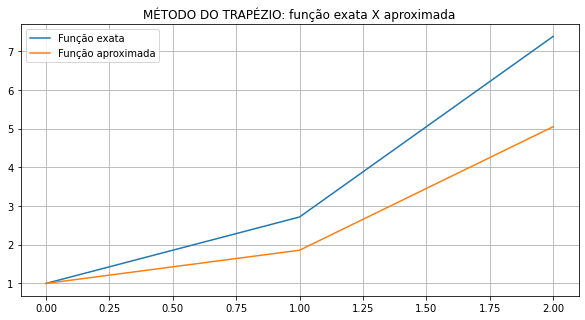

In [6]:
# Método do Trapézio

metodo_trapezio(f, x_i, x_f, h)

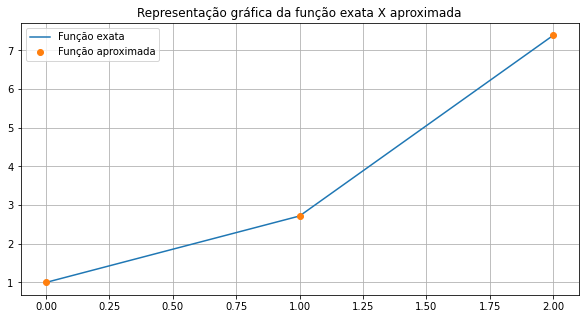

Área obtida pela função exata é: 11.107337927389695
Área obtida pelo método aplicado manualmente: 11.883746503899161
O erro cometido é: 0.7764085765094659


In [7]:
# Método de Simpson

metodo_simpson(f, x_i, x_f, 1)

O método do trapézio utiliza polinômios de primeiro grau (retas) para aproximar a função, enquanto o método de Simpson utiliza polinômios de segundo grau (parábolas). Essa diferença na ordem dos polinômios utilizados resulta em uma melhor precisão na aproximação da função pelo método de Simpson. As parábolas utilizadas podem se ajustar melhor ao comportamento da função, capturando curvaturas e variações ao longo do intervalo. Em contrapartida, as retas do método do trapézio são menos flexíveis e não conseguem se ajustar com a mesma precisão a sinuosidade da função.

Além disso, o método de Simpson também utiliza mais pontos de amostragem em cada subintervalo do que o método do trapézio. Enquanto o método do trapézio utiliza apenas dois pontos (os extremos de cada partição), o método de Simpson utiliza três pontos (os extremos e o ponto médio do subintervalo). Essa maior quantidade de pontos permite uma melhor representação da função e, consequentemente, uma aproximação mais precisa da integral.

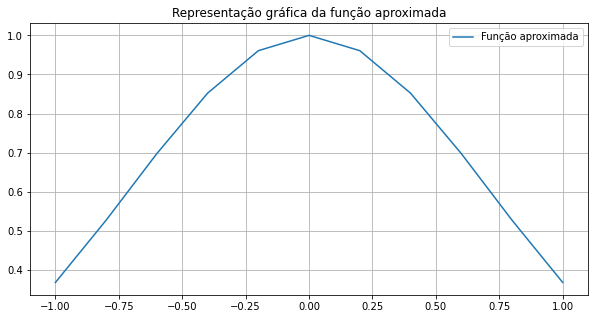

Área obtida pelo método aplicado manualmente: 3.4581044200298754
o número de pontos é: 11


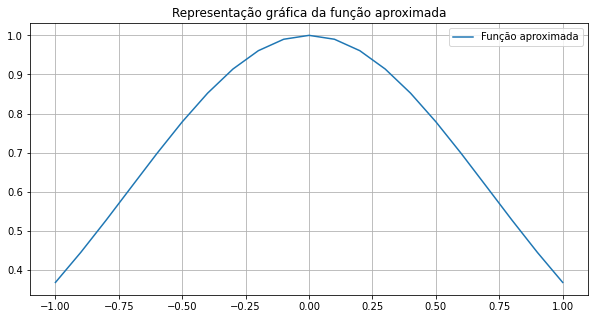

Área obtida pelo método aplicado manualmente: 3.472892497598144
o número de pontos é: 21


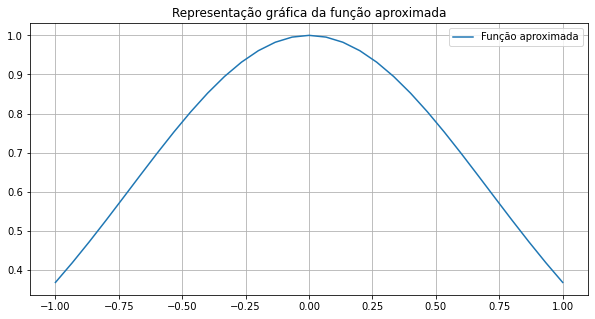

Área obtida pelo método aplicado manualmente: 3.475621458364012
o número de pontos é: 31


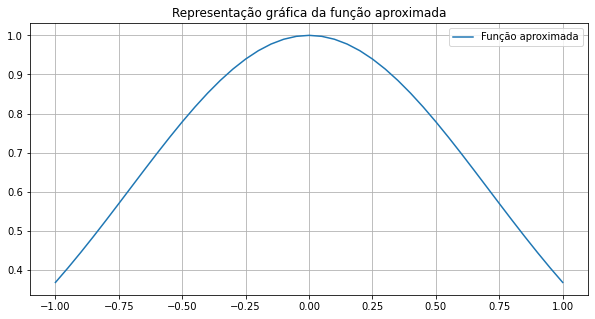

Área obtida pelo método aplicado manualmente: 3.4765758815772516
o número de pontos é: 41


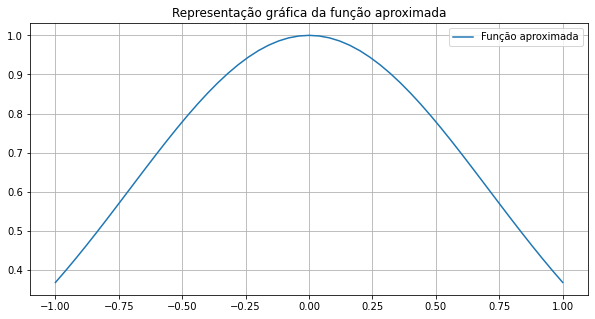

Área obtida pelo método aplicado manualmente: 3.477017517803015
o número de pontos é: 51


In [8]:
# Aplicando o método de Simpson para g(x)=exp(-x²) no intervalo [-1, 1] para diferentes intervalos

f = funcao_g
x_i = -1
x_f = 1
n = 0

while n < 25:
    n+=5
    metodo_simpson(f, x_i, x_f, n)
    print('o número de pontos é:', 2*n+1)

#### CONSIDERAÇÕES FINAIS
<hr>

Observa-se que quanto mais pontos forem adicionados ao intervalo de integração, a curva da função se torna mais bem definida, não havendo impacto no erro cometido, mas deve-se ponderar entre precisão no comportamento da função e custo de processamento operacional para a área de aplicação.

##### Observação: Se não há a solução analítica da função, só é possível saber se a aproximação está convergindo para a função ao analisar o comportamento no gráfico.